In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

def generate_data(n_samples, means, covariances, weights, random_state):
    np.random.seed(random_state)

    X = np.zeros((n_samples, 2))
    true_labels = np.zeros(n_samples, dtype=int)
    K = len(weights)

    cluster_indices = np.random.choice(
        range(K), size=n_samples, p=weights
    )

    for k in range(K):
        num_k = np.sum(cluster_indices == k)
        if num_k > 0:
            X_k = np.random.multivariate_normal(means[k], covariances[k], num_k)
            X[cluster_indices == k, :] = X_k
            true_labels[cluster_indices == k] = k

    return X, true_labels


def plot_data(X, labels, centroids=None, title="Data"):
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=labels, alpha=0.6)

    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    marker='x', s=200)

    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()


means = [
    np.array([-5.0, 0.0]),
    np.array([0.0, 5.0]),
    np.array([5.0, 0.0])
]
covariances = [
    np.array([[1.0, 0.0], [0.0, 1.0]]),
    np.array([[1.0, 0.8], [0.8, 1.0]]),
    np.array([[1.5, 0.0], [0.0, 1.5]])
]
weights = [0.3, 0.4, 0.3]

X, true_labels = generate_data(
    n_samples=1000,
    means=means,
    covariances=covariances,
    weights=weights,
    random_state=42
)
value_counts = pd.Series(true_labels).value_counts()
X.shape, true_labels.shape, X, value_counts

((1000, 2),
 (1000,),
 array([[-1.61062423,  3.7105593 ],
        [ 3.82860945,  0.57857717],
        [ 6.81766349,  0.43553563],
        ...,
        [-4.94298688,  0.26859228],
        [ 4.92435461,  0.58719354],
        [-0.27385352,  3.90820884]]),
 1    393
 0    319
 2    288
 Name: count, dtype: int64)

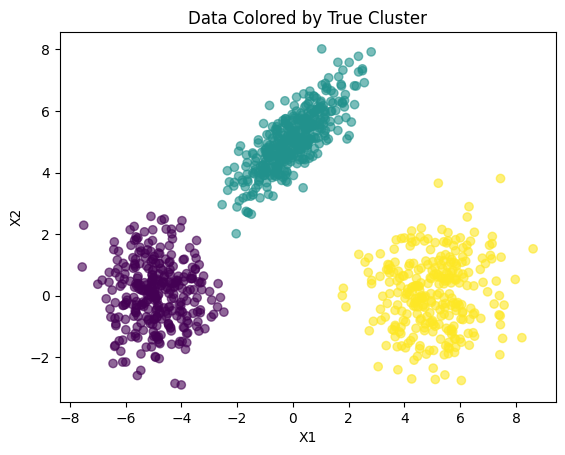

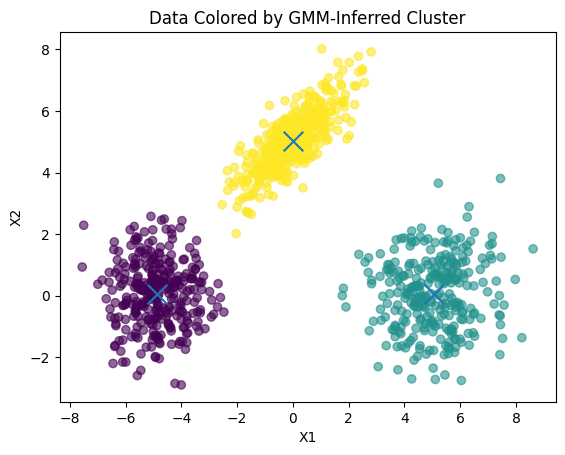

In [ ]:
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X)

predicted_labels = gmm.predict(X)
pred_centers = gmm.means_

plot_data(X, labels=true_labels, title="Data Colored by True Cluster")
plot_data(X, labels=predicted_labels, centroids=pred_centers,
          title="Data Colored by GMM-Inferred Cluster")